In [ ]:
import pandas as pd
import polars as pl
import numpy as np
import pyarrow
import matplotlib.pyplot as plt
import seaborn as sns
import os

# How much faster is polars?

In [5]:
from timeit import default_timer as timer
csv_path = "/kaggle/input/ecommerce-behavior-data-from-multi-category-store/2019-Nov.csv"

In [12]:
start_time = timer()
panda_df = pd.read_csv(csv_path)
end_time = timer()
end_time - start_time

121.3895667050001

In [13]:
del panda_df
del start_time
del end_time

In [14]:
start_time = timer()
polar_df = pl.read_csv(csv_path)
end_time = timer()
end_time - start_time

9.263151402000403

In [15]:
del polar_df
del start_time
del end_time

In [33]:
df = pl.read_csv(csv_path)

# Video One - Basic operations -> Select and filter

## Basic Operations

In [17]:
df.shape

(67501979, 9)

In [18]:
df.head(2)

event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
str,str,i64,i64,str,str,f64,i64,str
"""2019-11-01 00:00:00 UTC""","""view""",1003461,2053013555631882655,"""electronics.smartphone""","""xiaomi""",489.07,520088904,"""4d3b30da-a5e4-49df-b1a8-ba5943…"
"""2019-11-01 00:00:00 UTC""","""view""",5000088,2053013566100866035,"""appliances.sewing_machine""","""janome""",293.65,530496790,"""8e5f4f83-366c-4f70-860e-ca7417…"


In [13]:
df.head(2).to_pandas()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2019-11-01 00:00:00 UTC,view,1003461,2053013555631882655,electronics.smartphone,xiaomi,489.07,520088904,4d3b30da-a5e4-49df-b1a8-ba5943f1dd33
1,2019-11-01 00:00:00 UTC,view,5000088,2053013566100866035,appliances.sewing_machine,janome,293.65,530496790,8e5f4f83-366c-4f70-860e-ca7417414283


In [7]:
df.dtypes

[String, String, Int64, Int64, String, String, Float64, Int64, String]

# Selecting and Filtering Data

In [14]:
df[0, :] # No df.iloc or df.loc in polars

event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
str,str,i64,i64,str,str,f64,i64,str
"""2019-11-01 00:00:00 UTC""","""view""",1003461,2053013555631882655,"""electronics.smartphone""","""xiaomi""",489.07,520088904,"""4d3b30da-a5e4-49df-b1a8-ba5943…"


In [15]:
df[:, ["event_time", "price"]].head() # All the rows 2 columns

event_time,price
str,f64
"""2019-11-01 00:00:00 UTC""",489.07
"""2019-11-01 00:00:00 UTC""",293.65
"""2019-11-01 00:00:01 UTC""",28.31
"""2019-11-01 00:00:01 UTC""",712.87
"""2019-11-01 00:00:01 UTC""",183.27


# `filter()`

In [16]:
df.filter(pl.col("price") > 1000).head() # Filtering

event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
str,str,i64,i64,str,str,f64,i64,str
"""2019-11-01 00:00:27 UTC""","""view""",1004237,2053013555631882655,"""electronics.smartphone""","""apple""",1091.33,565404816,"""d9cf0ac4-c3ec-4e1f-83aa-326b1e…"
"""2019-11-01 00:00:40 UTC""","""view""",1005116,2053013555631882655,"""electronics.smartphone""","""apple""",1013.86,532647354,"""d2d3d2c6-631d-489e-9fb5-06f340…"
"""2019-11-01 00:00:41 UTC""","""view""",1004241,2053013555631882655,"""electronics.smartphone""","""apple""",1173.6,565404816,"""d9cf0ac4-c3ec-4e1f-83aa-326b1e…"
"""2019-11-01 00:00:41 UTC""","""view""",1004237,2053013555631882655,"""electronics.smartphone""","""apple""",1091.33,519277091,"""62fadce6-aa4a-4dde-92fc-c04c22…"
"""2019-11-01 00:00:51 UTC""","""view""",1307012,2053013558920217191,"""computers.notebook""","""apple""",2342.15,530857208,"""c69f9c63-7098-426c-97d9-8cb94a…"


In [17]:
df.sample(5) # Sample of 5

event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
str,str,i64,i64,str,str,f64,i64,str
"""2019-11-16 02:24:37 UTC""","""view""",1005171,2053013555631882655,"""electronics.smartphone""","""samsung""",206.43,529257039,"""3020f77c-2149-4b48-a003-1b3501…"
"""2019-11-27 15:01:44 UTC""","""purchase""",1005229,2053013555631882655,"""electronics.smartphone""","""honor""",283.12,555969215,"""96875e9f-fda3-4a92-80fc-6822bc…"
"""2019-11-23 05:32:58 UTC""","""view""",10300496,2053013553115300101,null,"""silverlit""",7.7,569569803,"""c50d8670-2836-42ca-9105-c10261…"
"""2019-11-17 02:17:24 UTC""","""view""",13200722,2053013557192163841,"""furniture.bedroom.bed""",null,218.8,541811854,"""b0b67bbc-c45c-4581-8419-fe472f…"
"""2019-11-10 15:15:15 UTC""","""view""",52900016,2139150089359196199,"""accessories.bag""","""stanley""",17.94,543211131,"""faf77c34-0ecc-4cdc-a52d-fc0c6c…"


In [18]:
df.select(["brand", "price"]).head()

brand,price
str,f64
"""xiaomi""",489.07
"""janome""",293.65
"""creed""",28.31
"""lg""",712.87
"""xiaomi""",183.27


In [19]:
# Create a new column
df.with_columns([
    (pl.col("price") * 100).alias("price_x_100")
]).head() 

event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,price_x_100
str,str,i64,i64,str,str,f64,i64,str,f64
"""2019-11-01 00:00:00 UTC""","""view""",1003461,2053013555631882655,"""electronics.smartphone""","""xiaomi""",489.07,520088904,"""4d3b30da-a5e4-49df-b1a8-ba5943…",48907.0
"""2019-11-01 00:00:00 UTC""","""view""",5000088,2053013566100866035,"""appliances.sewing_machine""","""janome""",293.65,530496790,"""8e5f4f83-366c-4f70-860e-ca7417…",29365.0
"""2019-11-01 00:00:01 UTC""","""view""",17302664,2053013553853497655,null,"""creed""",28.31,561587266,"""755422e7-9040-477b-9bd2-6a6e8f…",2831.0
"""2019-11-01 00:00:01 UTC""","""view""",3601530,2053013563810775923,"""appliances.kitchen.washer""","""lg""",712.87,518085591,"""3bfb58cd-7892-48cc-8020-2f17e6…",71287.0
"""2019-11-01 00:00:01 UTC""","""view""",1004775,2053013555631882655,"""electronics.smartphone""","""xiaomi""",183.27,558856683,"""313628f1-68b8-460d-84f6-cec7a8…",18327.0


# `is_in()`

In [20]:
# Filtering based on brand
df.filter(pl.col("brand").is_in(["apple", "samsung", "motorola"])).head()

event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
str,str,i64,i64,str,str,f64,i64,str
"""2019-11-01 00:00:02 UTC""","""view""",1004258,2053013555631882655,"""electronics.smartphone""","""apple""",732.07,532647354,"""d2d3d2c6-631d-489e-9fb5-06f340…"
"""2019-11-01 00:00:05 UTC""","""view""",4600658,2053013563944993659,"""appliances.kitchen.dishwasher""","""samsung""",411.83,526595547,"""aab33a9a-29c3-4d50-84c1-8a2bc9…"
"""2019-11-01 00:00:10 UTC""","""view""",1005115,2053013555631882655,"""electronics.smartphone""","""apple""",949.47,562079864,"""0fe64462-83eb-4131-ab00-8e764d…"
"""2019-11-01 00:00:14 UTC""","""view""",1002544,2053013555631882655,"""electronics.smartphone""","""apple""",458.28,549256216,"""dcbdc6e4-cd49-4ee8-95c5-e85f3c…"
"""2019-11-01 00:00:14 UTC""","""cart""",1005014,2053013555631882655,"""electronics.smartphone""","""samsung""",503.09,533326659,"""6b928be2-2bce-4640-8296-0efdf2…"


# `n_unique()`

In [21]:
df.select([
    pl.col("product_id").n_unique()
])

product_id
u32
190662


# `min() max() mean() median() std()`

In [29]:
mean = df.select([
    pl.col("price").mean().alias("mean")
])

mean

mean
f64
292.459317


In [26]:
df.describe()

statistic,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
str,str,str,f64,f64,str,str,f64,f64,str
"""count""","""67501979""","""67501979""",6.7501979e7,6.7501979e7,"""45603808""","""58283744""",6.7501979e7,6.7501979e7,"""67501969"""
"""null_count""","""0""","""0""",0.0,0.0,"""21898171""","""9218235""",0.0,0.0,"""10"""
"""mean""",null,null,1.2514e7,2.0579e18,null,null,292.459317,5.3864e8,null
"""std""",null,null,1.7257e7,2.0125e16,null,null,355.6745,2.2885e7,null
"""min""","""2019-11-01 00:00:00 UTC""","""cart""",1.000365e6,2.0530e18,"""accessories.bag""","""a-case""",0.0,1.0300217e7,"""0000007c-adbf-4ed7-af17-d1fef9…"
"""25%""",null,null,1.305977e6,2.0530e18,null,null,69.24,5.16476241e8,null
"""50%""",null,null,5.100568e6,2.0530e18,null,null,165.77,5.35057264e8,null
"""75%""",null,null,1.7300752e7,2.0530e18,null,null,360.34,5.61079379e8,null
"""max""","""2019-11-30 23:59:59 UTC""","""view""",1.00028554e8,2.1877e18,"""stationery.cartrige""","""zyxel""",2574.07,5.79969851e8,"""fffffde2-4522-4b44-8a32-510c55…"


In [31]:
price = df.select(
    pl.col("price")
)

# Plot in pandas

array([[<Axes: title={'center': 'price'}>]], dtype=object)

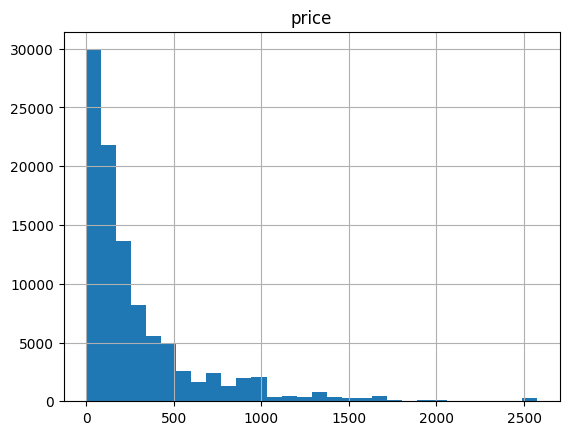

In [35]:
price.sample(100000).to_pandas().hist(bins = 30)

In [32]:
probs = [0, 0.25, 0.5, 0.75, 1]
# min, q1, q2, q3, max
percentiles = [price.quantile(prob)[0,0] for prob in probs] 
percentiles

[0.0, 69.24, 165.77, 360.34, 2574.07]

In [38]:
pd.DataFrame(dict(probs = probs, percentiles = percentiles))

,probs,percentiles
0,0.00,0.00
1,0.25,69.24
2,0.50,165.77
3,0.75,360.34
4,1.00,2574.07


# Video 2 - Update columns and Window Functions

In [39]:
df.head()

event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
str,str,i64,i64,str,str,f64,i64,str
"""2019-11-01 00:00:00 UTC""","""view""",1003461,2053013555631882655,"""electronics.smartphone""","""xiaomi""",489.07,520088904,"""4d3b30da-a5e4-49df-b1a8-ba5943…"
"""2019-11-01 00:00:00 UTC""","""view""",5000088,2053013566100866035,"""appliances.sewing_machine""","""janome""",293.65,530496790,"""8e5f4f83-366c-4f70-860e-ca7417…"
"""2019-11-01 00:00:01 UTC""","""view""",17302664,2053013553853497655,null,"""creed""",28.31,561587266,"""755422e7-9040-477b-9bd2-6a6e8f…"
"""2019-11-01 00:00:01 UTC""","""view""",3601530,2053013563810775923,"""appliances.kitchen.washer""","""lg""",712.87,518085591,"""3bfb58cd-7892-48cc-8020-2f17e6…"
"""2019-11-01 00:00:01 UTC""","""view""",1004775,2053013555631882655,"""electronics.smartphone""","""xiaomi""",183.27,558856683,"""313628f1-68b8-460d-84f6-cec7a8…"


In [40]:
df_top = df.head()

# `df.with_columns() df.select()`

In [43]:
# Can do more than 1 operation
df_top.with_columns(
    ("brand-" + pl.col("brand")).alias("brand2"),
    (pl.col("price") * 100).alias("price2")
).head()

event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,brand2,price2
str,str,i64,i64,str,str,f64,i64,str,str,f64
"""2019-11-01 00:00:00 UTC""","""view""",1003461,2053013555631882655,"""electronics.smartphone""","""xiaomi""",489.07,520088904,"""4d3b30da-a5e4-49df-b1a8-ba5943…","""brand-xiaomi""",48907.0
"""2019-11-01 00:00:00 UTC""","""view""",5000088,2053013566100866035,"""appliances.sewing_machine""","""janome""",293.65,530496790,"""8e5f4f83-366c-4f70-860e-ca7417…","""brand-janome""",29365.0
"""2019-11-01 00:00:01 UTC""","""view""",17302664,2053013553853497655,null,"""creed""",28.31,561587266,"""755422e7-9040-477b-9bd2-6a6e8f…","""brand-creed""",2831.0
"""2019-11-01 00:00:01 UTC""","""view""",3601530,2053013563810775923,"""appliances.kitchen.washer""","""lg""",712.87,518085591,"""3bfb58cd-7892-48cc-8020-2f17e6…","""brand-lg""",71287.0
"""2019-11-01 00:00:01 UTC""","""view""",1004775,2053013555631882655,"""electronics.smartphone""","""xiaomi""",183.27,558856683,"""313628f1-68b8-460d-84f6-cec7a8…","""brand-xiaomi""",18327.0


In [45]:
# .select only gives you the ones you created
df_top.select(
    ("brand-" + pl.col("brand")).alias("brand2"),
    (pl.col("price") * 100).alias("price2")
).head()

brand2,price2
str,f64
"""brand-xiaomi""",48907.0
"""brand-janome""",29365.0
"""brand-creed""",2831.0
"""brand-lg""",71287.0
"""brand-xiaomi""",18327.0


# `pl.all()`

In [48]:
# Or you can select all
df_top.select([
    pl.all(),
    pl.col("price").mean().alias("price_avg")
])

event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,price_avg
str,str,i64,i64,str,str,f64,i64,str,f64
"""2019-11-01 00:00:00 UTC""","""view""",1003461,2053013555631882655,"""electronics.smartphone""","""xiaomi""",489.07,520088904,"""4d3b30da-a5e4-49df-b1a8-ba5943…",341.434
"""2019-11-01 00:00:00 UTC""","""view""",5000088,2053013566100866035,"""appliances.sewing_machine""","""janome""",293.65,530496790,"""8e5f4f83-366c-4f70-860e-ca7417…",341.434
"""2019-11-01 00:00:01 UTC""","""view""",17302664,2053013553853497655,null,"""creed""",28.31,561587266,"""755422e7-9040-477b-9bd2-6a6e8f…",341.434
"""2019-11-01 00:00:01 UTC""","""view""",3601530,2053013563810775923,"""appliances.kitchen.washer""","""lg""",712.87,518085591,"""3bfb58cd-7892-48cc-8020-2f17e6…",341.434
"""2019-11-01 00:00:01 UTC""","""view""",1004775,2053013555631882655,"""electronics.smartphone""","""xiaomi""",183.27,558856683,"""313628f1-68b8-460d-84f6-cec7a8…",341.434


# `over()`

In [49]:
# Compute mean within each category
df.with_columns([
    pl.col("price").mean().over("category_code").alias("price_by_categorycode")
])

event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,price_by_categorycode
str,str,i64,i64,str,str,f64,i64,str,f64
"""2019-11-01 00:00:00 UTC""","""view""",1003461,2053013555631882655,"""electronics.smartphone""","""xiaomi""",489.07,520088904,"""4d3b30da-a5e4-49df-b1a8-ba5943…",483.637803
"""2019-11-01 00:00:00 UTC""","""view""",5000088,2053013566100866035,"""appliances.sewing_machine""","""janome""",293.65,530496790,"""8e5f4f83-366c-4f70-860e-ca7417…",244.516497
"""2019-11-01 00:00:01 UTC""","""view""",17302664,2053013553853497655,null,"""creed""",28.31,561587266,"""755422e7-9040-477b-9bd2-6a6e8f…",176.64639
"""2019-11-01 00:00:01 UTC""","""view""",3601530,2053013563810775923,"""appliances.kitchen.washer""","""lg""",712.87,518085591,"""3bfb58cd-7892-48cc-8020-2f17e6…",340.601164
"""2019-11-01 00:00:01 UTC""","""view""",1004775,2053013555631882655,"""electronics.smartphone""","""xiaomi""",183.27,558856683,"""313628f1-68b8-460d-84f6-cec7a8…",483.637803
…,…,…,…,…,…,…,…,…,…
"""2019-11-30 23:59:58 UTC""","""view""",15700137,2053013559733912211,null,null,277.74,532714000,"""02b4131c-0112-4231-aafa-ceaa08…",176.64639
"""2019-11-30 23:59:58 UTC""","""view""",28719425,2053013565639492569,"""apparel.shoes""","""baden""",62.81,545223467,"""734c5eef-0742-4f8b-9d22-48f75b…",89.073566
"""2019-11-30 23:59:59 UTC""","""view""",1004833,2053013555631882655,"""electronics.smartphone""","""samsung""",167.03,557794415,"""6fecf566-ebb0-4e70-a243-cdc13c…",483.637803


In [19]:
df_cat_window = df.select([
    pl.col("category_code"),
    pl.col("price"),
    # price divided by average
    (pl.col("price") / pl.col("price").mean().over("category_code") - 1).alias("price_div_cat_average")
])

df_cat_window.head()

category_code,price,price_div_cat_average
str,f64,f64
"""electronics.smartphone""",489.07,0.011232
"""appliances.sewing_machine""",293.65,0.200941
null,28.31,-0.839736
"""appliances.kitchen.washer""",712.87,1.092976
"""electronics.smartphone""",183.27,-0.621059


# `to_pandas() sample()`

In [20]:
df_cat_window_sample = df_cat_window.sample(100000).to_pandas()

In [22]:
df_cat_window_sample.head()

,category_code,price,price_div_cat_average
0,electronics.smartphone,202.32,-0.581670
1,electronics.smartphone,138.23,-0.714187
2,None,411.59,1.330022
3,appliances.kitchen.juicer,28.29,-0.763421
4,electronics.smartphone,126.86,-0.737696


<Axes: >

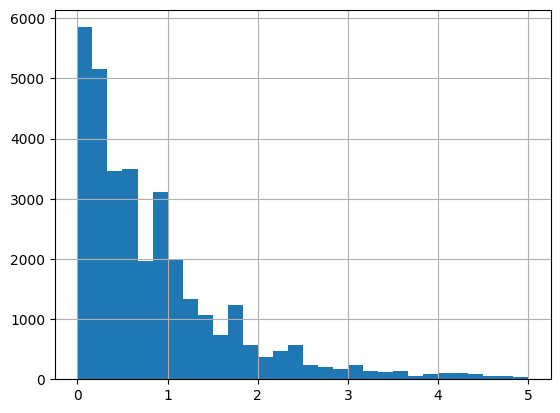

In [21]:
df_cat_window_sample.price_div_cat_average.hist(bins = 30, range = [0,5])

In [24]:
df_cat_window_sample.price_div_cat_average.quantile(np.arange(0,1.1,0.1))

0.0    -1.000000
0.1    -0.803279
0.2    -0.707819
0.3    -0.597343
0.4    -0.480125
0.5    -0.335447
0.6    -0.124896
0.7     0.106510
0.8     0.483838
0.9     1.064892
1.0    20.760832
Name: price_div_cat_average, dtype: float64

# `pl.from_pandas()`

In [29]:
pandas_cat_window_sample = pl.from_pandas(df_cat_window_sample)

pandas_cat_window_sample.filter(
    (pl.col("price_div_cat_average")) > 10
)

category_code,price,price_div_cat_average
str,f64,f64
"""appliances.environment.air_hea…",775.82,11.877853
null,2080.54,10.777993
null,2539.83,13.378046
null,2456.64,12.907106
"""electronics.audio.subwoofer""",1876.5,17.831339
…,…,…
null,2572.23,13.561464
null,2239.18,11.676059
null,2522.59,13.28045


# Video 3 - GroupBy

In [15]:
import pandas as pd
import polars as pl
import numpy as np
import pyarrow
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [17]:
csv_path = "/kaggle/input/ecommerce-behavior-data-from-multi-category-store/2019-Nov.csv"
df = pl.read_csv(csv_path)

In [18]:
df.head()

event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
str,str,i64,i64,str,str,f64,i64,str
"""2019-11-01 00:00:00 UTC""","""view""",1003461,2053013555631882655,"""electronics.smartphone""","""xiaomi""",489.07,520088904,"""4d3b30da-a5e4-49df-b1a8-ba5943…"
"""2019-11-01 00:00:00 UTC""","""view""",5000088,2053013566100866035,"""appliances.sewing_machine""","""janome""",293.65,530496790,"""8e5f4f83-366c-4f70-860e-ca7417…"
"""2019-11-01 00:00:01 UTC""","""view""",17302664,2053013553853497655,null,"""creed""",28.31,561587266,"""755422e7-9040-477b-9bd2-6a6e8f…"
"""2019-11-01 00:00:01 UTC""","""view""",3601530,2053013563810775923,"""appliances.kitchen.washer""","""lg""",712.87,518085591,"""3bfb58cd-7892-48cc-8020-2f17e6…"
"""2019-11-01 00:00:01 UTC""","""view""",1004775,2053013555631882655,"""electronics.smartphone""","""xiaomi""",183.27,558856683,"""313628f1-68b8-460d-84f6-cec7a8…"


# `group_by()` `agg()` `pl.len()` `.sort()`

In [32]:
df.group_by("brand").agg([
    pl.len()
]).sort("len", descending = True).head()

brand,len
str,u32
null,9218235
"""samsung""",7889245
"""apple""",6259379
"""xiaomi""",4638062
"""huawei""",1410126


# Very readable

In [35]:
# Create percent column
(
df.group_by("brand").agg([
    pl.len()
])
    .sort("len", descending = True)
    .with_columns([
    (pl.col("len") / pl.col("len").sum()).alias("n_pct")
])
    .head(10)
)

brand,len,n_pct
str,u32,f64
null,9218235,0.136562
"""samsung""",7889245,0.116874
"""apple""",6259379,0.092729
"""xiaomi""",4638062,0.06871
"""huawei""",1410126,0.02089
"""lucente""",1185075,0.017556
"""lg""",1096990,0.016251
"""bosch""",975059,0.014445
"""oppo""",811698,0.012025


# `value_counts()`

In [36]:
df.sample(5)

event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
str,str,i64,i64,str,str,f64,i64,str
"""2019-11-11 07:49:16 UTC""","""view""",4803399,2053013554658804075,"""electronics.audio.headphone""","""jbl""",33.21,534539547,"""faea571c-74c9-4721-b839-5b0e5f…"
"""2019-11-22 07:40:23 UTC""","""cart""",12703415,2053013553559896355,null,"""cordiant""",48.91,515833891,"""84905e9f-3ca9-4110-a15f-6078b1…"
"""2019-11-26 17:12:03 UTC""","""view""",19600387,2053013558836331105,null,null,15.83,553018618,"""4bce464b-59ec-4ab1-b85d-919cfe…"
"""2019-11-08 13:07:00 UTC""","""view""",28714290,2053013565069067197,"""apparel.shoes.keds""","""nike""",144.12,543995509,"""2a7e3399-5bb0-4750-81e1-d281d3…"
"""2019-11-05 16:00:10 UTC""","""view""",13700195,2053013557452210699,null,"""erlit""",301.5,561612016,"""140ff6ba-5496-4a37-b4b6-10d072…"


In [37]:
df["event_type"].value_counts()

event_type,count
str,u32
"""view""",63556110
"""cart""",3028930
"""purchase""",916939


In [40]:
# Works for multiple combos
df_brand_event = df.group_by(["brand", "event_type"]).agg([
    pl.len()
])

df_brand_event.head(5)

brand,event_type,len
str,str,u32
"""pintinox""","""purchase""",3
"""klorane""","""cart""",11
"""antoniolavazza""","""view""",19
"""zx""","""view""",9
"""gt""","""cart""",6


# `pivot()`
# - columns -> on

In [42]:
# Turn it from long to wide
df_brand_event_wide = df_brand_event.pivot(values = "len",
                                          index = ["brand"],
                                          columns = ["event_type"])
df_brand_event_wide.head()

/tmp/ipykernel_151/2864707848.py:1: DeprecationWarning: The argument `columns` for `DataFrame.pivot` is deprecated. It has been renamed to `on`.
  df_brand_event_wide = df_brand_event.pivot(values = "len",


brand,purchase,cart,view
str,u32,u32,u32
"""pintinox""",3,10,1697
"""klorane""",2,11,642
"""antoniolavazza""",null,null,19
"""zx""",null,null,9
"""gt""",2,6,1084


In [49]:
df_brand_event_wide_2 = (
    df_brand_event
    .pivot(values = "len", index = ["brand"], on = ["event_type"])
    .sort("view", descending = True)
)

df_brand_event_wide_2.head()

brand,purchase,cart,view
str,u32,u32,u32
null,73273,258242,8886720
"""samsung""",200027,597220,7091998
"""apple""",166064,489665,5603650
"""xiaomi""",68292,260019,4309751
"""huawei""",23703,73760,1312663


In [50]:
agg_performance = df_brand_event_wide_2.with_columns([
    (pl.col("cart") / pl.col("view")).alias("cart_by_views"),
    (pl.col("purchase") / pl.col("cart")).alias("buy_by_cart"),
    (pl.col("purchase") / pl.col("view")).alias("buy_by_views"),
])
agg_performance.head()

brand,purchase,cart,view,cart_by_views,buy_by_cart,buy_by_views
str,u32,u32,u32,f64,f64,f64
null,73273,258242,8886720,0.029059,0.283738,0.008245
"""samsung""",200027,597220,7091998,0.08421,0.33493,0.028205
"""apple""",166064,489665,5603650,0.087383,0.339138,0.029635
"""xiaomi""",68292,260019,4309751,0.060333,0.262642,0.015846
"""huawei""",23703,73760,1312663,0.056191,0.321353,0.018057


In [55]:
agg_performance.filter(pl.col("buy_by_cart") < 1)\
.select(["cart_by_views", "buy_by_cart", "buy_by_views"])\
.to_pandas()\
.quantile([0, 0.25, 0.5, 0.75, 0.99, 1])

,cart_by_views,buy_by_cart,buy_by_views
0.00,0.001115,0.026810,0.000353
0.25,0.014640,0.210685,0.003704
0.50,0.024419,0.279579,0.006616
0.75,0.037220,0.343597,0.010874
0.99,0.121112,0.750000,0.043861
1.00,0.400000,0.900000,0.200000


# Group By -UserId + 2 Groups

In [58]:
df_user_brand_event = df.group_by(["user_id", "brand", "event_type"]).agg([
    pl.len()
])

df_user_brand_event.head()

user_id,brand,event_type,len
i64,str,str,u32
532931806,"""apple""","""view""",59
564659796,"""apple""","""view""",1
522552243,"""hp""","""view""",6
546883800,"""legre""","""view""",1
536812506,"""llorens""","""view""",1


In [59]:
df_user_brand_event.shape

(17798395, 4)

In [61]:
df_user_brand_event_2 = (df_user_brand_event
    .pivot(values = "len", index = ["user_id", "brand"], on = ["event_type"])
    .sort("purchase", descending = True)
)

df_user_brand_event_2.head()

user_id,brand,view,cart,purchase
i64,str,u32,u32,u32
532931806,"""apple""",59,21,null
564659796,"""apple""",1,null,null
522552243,"""hp""",6,null,null
546883800,"""legre""",1,null,null
536812506,"""llorens""",1,null,null


# `fill_null()`
# - fillna 

In [64]:
df_user_brand_3 = df_user_brand_event_2.with_columns([
    pl.col("purchase").fill_null(strategy = "zero"),
    pl.col("view").fill_null(strategy = "zero"),
    pl.col("cart").fill_null(strategy = "zero")
])
df_user_brand_3.head()

user_id,brand,view,cart,purchase
i64,str,u32,u32,u32
532931806,"""apple""",59,21,0
564659796,"""apple""",1,0,0
522552243,"""hp""",6,0,0
546883800,"""legre""",1,0,0
536812506,"""llorens""",1,0,0


In [67]:
df_user_brand_4 = df_user_brand_3.with_columns([
    (pl.col("purchase") / pl.col("view")).alias("pct_buy_views")
])
df_user_brand_4.head()

user_id,brand,view,cart,purchase,pct_buy_views
i64,str,u32,u32,u32,f64
532931806,"""apple""",59,21,0,0.0
564659796,"""apple""",1,0,0,0.0
522552243,"""hp""",6,0,0,0.0
546883800,"""legre""",1,0,0,0.0
536812506,"""llorens""",1,0,0,0.0


# `pl.when() .then() .otherwise() .is_infinite()`
# - if else statements pretty much

In [69]:
df_user_brand_5 = df_user_brand_4.with_columns(
    pl.when(pl.col("pct_buy_views").is_infinite())
        .then(None)
        .otherwise(pl.col("pct_buy_views")) # Keep it the same
)
df_user_brand_5.head()

user_id,brand,view,cart,purchase,pct_buy_views,literal
i64,str,u32,u32,u32,f64,f64
532931806,"""apple""",59,21,0,0.0,0.0
564659796,"""apple""",1,0,0,0.0,0.0
522552243,"""hp""",6,0,0,0.0,0.0
546883800,"""legre""",1,0,0,0.0,0.0
536812506,"""llorens""",1,0,0,0.0,0.0


# Video 4 - RFM Analysis - GroupBy

In [70]:
df.head()

event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
str,str,i64,i64,str,str,f64,i64,str
"""2019-11-01 00:00:00 UTC""","""view""",1003461,2053013555631882655,"""electronics.smartphone""","""xiaomi""",489.07,520088904,"""4d3b30da-a5e4-49df-b1a8-ba5943…"
"""2019-11-01 00:00:00 UTC""","""view""",5000088,2053013566100866035,"""appliances.sewing_machine""","""janome""",293.65,530496790,"""8e5f4f83-366c-4f70-860e-ca7417…"
"""2019-11-01 00:00:01 UTC""","""view""",17302664,2053013553853497655,null,"""creed""",28.31,561587266,"""755422e7-9040-477b-9bd2-6a6e8f…"
"""2019-11-01 00:00:01 UTC""","""view""",3601530,2053013563810775923,"""appliances.kitchen.washer""","""lg""",712.87,518085591,"""3bfb58cd-7892-48cc-8020-2f17e6…"
"""2019-11-01 00:00:01 UTC""","""view""",1004775,2053013555631882655,"""electronics.smartphone""","""xiaomi""",183.27,558856683,"""313628f1-68b8-460d-84f6-cec7a8…"


# `.str` `.strptime` `pl.Datetime` -> format = 
<h2>
    
%Y: 4-digit Year (e.g., 2024)
    
%m: Month as a zero-padded number (e.g., 01 for January)

%d: Day of the month (e.g., 15)

%H: Hour in 24-hour format (e.g., 14 for 2 PM)

%M: Minute (e.g., 05)

%S: Second (e.g., 59)

%Z: Timezone name (e.g., UTC)
</h2>


In [73]:
df = df.with_columns(
    pl.col("event_time").str.strptime(pl.Datetime, format = "%Y-%m-%d %H:%M:%S %Z")
)
df.head()

event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
datetime[μs],str,i64,i64,str,str,f64,i64,str
2019-11-01 00:00:00,"""view""",1003461,2053013555631882655,"""electronics.smartphone""","""xiaomi""",489.07,520088904,"""4d3b30da-a5e4-49df-b1a8-ba5943…"
2019-11-01 00:00:00,"""view""",5000088,2053013566100866035,"""appliances.sewing_machine""","""janome""",293.65,530496790,"""8e5f4f83-366c-4f70-860e-ca7417…"
2019-11-01 00:00:01,"""view""",17302664,2053013553853497655,null,"""creed""",28.31,561587266,"""755422e7-9040-477b-9bd2-6a6e8f…"
2019-11-01 00:00:01,"""view""",3601530,2053013563810775923,"""appliances.kitchen.washer""","""lg""",712.87,518085591,"""3bfb58cd-7892-48cc-8020-2f17e6…"
2019-11-01 00:00:01,"""view""",1004775,2053013555631882655,"""electronics.smartphone""","""xiaomi""",183.27,558856683,"""313628f1-68b8-460d-84f6-cec7a8…"


<h1>
    
`.str.contains(r"pattern")`: Returns True if the regex matches anywhere in the string.
    
`.str.extract(r"(group)", 1)`: Pulls out a specific capture group from your pattern.

`.str.extract_all(r"\d+")`: Finds every match and returns them as a List (e.g., extracting all numbers from a sentence).

`.str.replace(r"old", "new")`: Replaces the first match of your regex.

`.str.replace_all(r"old", "new")`: Replaces every match it finds in the string.
</h1>

In [74]:
df.filter(pl.col("user_id") == 520088904).to_pandas().sample(5)

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
16,2019-11-01 00:44:03,view,1701474,2053013553031414015,computers.peripherals.monitor,acer,227.03,520088904,bbd7ce29-5406-4c52-b239-f0dd3b12427e
28,2019-11-15 19:10:52,view,4803776,2053013554658804075,electronics.audio.headphone,sven,23.42,520088904,bb7e87b8-0aa6-48b1-97a6-3178a2166532
0,2019-11-01 00:00:00,view,1003461,2053013555631882655,electronics.smartphone,xiaomi,489.07,520088904,4d3b30da-a5e4-49df-b1a8-ba5943f1dd33
10,2019-11-01 00:41:28,view,1480555,2053013561092866779,computers.desktop,netechnics,553.40,520088904,bbd7ce29-5406-4c52-b239-f0dd3b12427e
11,2019-11-01 00:41:37,view,1480709,2053013561092866779,computers.desktop,pulser,592.01,520088904,bbd7ce29-5406-4c52-b239-f0dd3b12427e


In [75]:
df_purchases = df.filter(pl.col("event_type") == "purchase")
df_purchases.head()

event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
datetime[μs],str,i64,i64,str,str,f64,i64,str
2019-11-01 00:00:41,"""purchase""",13200605,2053013557192163841,"""furniture.bedroom.bed""",null,566.3,559368633,"""d6034fa2-41fb-4ac0-9051-55ea9f…"
2019-11-01 00:01:04,"""purchase""",1005161,2053013555631882655,"""electronics.smartphone""","""xiaomi""",211.92,513351129,"""e6b7ce9b-1938-4e20-976c-8b4163…"
2019-11-01 00:04:51,"""purchase""",1004856,2053013555631882655,"""electronics.smartphone""","""samsung""",128.42,562958505,"""0f039697-fedc-40fa-8830-39c1a0…"
2019-11-01 00:05:34,"""purchase""",26401669,2053013563651392361,null,"""lucente""",109.66,541854711,"""c41c44d5-ef9b-41b9-9cd6-8d96dd…"
2019-11-01 00:06:33,"""purchase""",1801881,2053013554415534427,"""electronics.video.tv""","""samsung""",488.8,557746614,"""4d76d6d3-fff5-4880-8327-e9e57b…"


In [78]:
df_purchases = df_purchases.select(["event_time", "user_id", "price"]).unique()
df_purchases.head()

event_time,user_id,price
datetime[μs],i64,f64
2019-11-27 06:39:11,529180030,1362.45
2019-11-30 11:01:08,560757607,161.36
2019-11-14 07:46:33,568609635,739.21
2019-11-17 16:00:19,514077670,259.98
2019-11-14 16:10:01,548764787,386.08


In [76]:
from datetime import datetime

anchor_date = datetime(2019, 11, 30)

In [79]:
df_purchases = df_purchases.with_columns(
    (anchor_date - pl.col("event_time")).alias("date_diff") / (1e6 * 3600 * 24)
)
df_purchases.head()

event_time,user_id,price,date_diff
datetime[μs],i64,f64,duration[μs]
2019-11-27 06:39:11,529180030,1362.45,2µs
2019-11-30 11:01:08,560757607,161.36,0µs
2019-11-14 07:46:33,568609635,739.21,15µs
2019-11-17 16:00:19,514077670,259.98,12µs
2019-11-14 16:10:01,548764787,386.08,15µs


In [83]:
df_agg = df_purchases.group_by("user_id").agg([
    pl.col("date_diff").min().alias("recency"),
    pl.len().alias("frequency"),
    pl.col("price").sum().alias("monetary")
])
df_agg.head()

user_id,recency,frequency,monetary
i64,duration[μs],u32,f64
566665007,27µs,1,358.31
565832837,5µs,3,266.96
514501447,12µs,8,859.82
536012324,1µs,5,40.02
513458858,12µs,1,142.86


In [86]:
df_agg_pandas = df_agg.to_pandas()

In [87]:
breaks = np.arange(0,1.1,0.1)
num_vars = ["recency", "frequency", "monetary"]
df_agg_pandas[num_vars].quantile(breaks)

,recency,frequency,monetary
0.0,0 days 00:00:00,1.0,0.770
0.1,0 days 00:00:00.000001,1.0,43.240
0.2,0 days 00:00:00.000004,1.0,84.660
0.3,0 days 00:00:00.000008,1.0,128.420
0.4,0 days 00:00:00.000012,1.0,176.850
0.5,0 days 00:00:00.000012,1.0,246.040
0.6,0 days 00:00:00.000012,1.0,339.720
0.7,0 days 00:00:00.000015,2.0,494.170
0.8,0 days 00:00:00.000019,2.0,795.474
0.9,0 days 00:00:00.000024,4.0,1364.000


# Niche stuff

In [89]:
import polars as pl
from datetime import datetime

data = {
    "user_id": [1, 1, 1, 2, 2, 3, 3, 3, 3],
    "timestamp": [
        datetime(2024, 1, 1, 10, 0), datetime(2024, 1, 1, 10, 10), datetime(2024, 1, 2, 11, 0),
        datetime(2024, 1, 1, 12, 0), datetime(2024, 1, 1, 12, 0), 
        datetime(2024, 1, 1, 9, 0), datetime(2024, 1, 1, 9, 15), datetime(2024, 1, 1, 9, 30), datetime(2024, 1, 1, 10, 0)
    ],
    "category": ["electronics", "electronics", "home", "home", "home", "fashion", "fashion", "electronics", "fashion"],
    "price": [100, 150, 50, 40, 40, 20, 25, 120, 30],
    "rating": [4.5, 4.0, 3.5, 4.8, 4.8, 3.0, 3.2, 4.1, 3.8]
}

df = pl.DataFrame(data)
df

user_id,timestamp,category,price,rating
i64,datetime[μs],str,i64,f64
1,2024-01-01 10:00:00,"""electronics""",100,4.5
1,2024-01-01 10:10:00,"""electronics""",150,4.0
1,2024-01-02 11:00:00,"""home""",50,3.5
2,2024-01-01 12:00:00,"""home""",40,4.8
2,2024-01-01 12:00:00,"""home""",40,4.8
3,2024-01-01 09:00:00,"""fashion""",20,3.0
3,2024-01-01 09:15:00,"""fashion""",25,3.2
3,2024-01-01 09:30:00,"""electronics""",120,4.1
3,2024-01-01 10:00:00,"""fashion""",30,3.8


# See which ones are above average
## `cs.numeric` `name.suffix`

In [93]:
import polars.selectors as cs

df.with_columns(
    (cs.numeric() > cs.numeric().mean().over("category")).name.suffix("_is_above_avg")
)

user_id,timestamp,category,price,rating,user_id_is_above_avg,price_is_above_avg,rating_is_above_avg
i64,datetime[μs],str,i64,f64,bool,bool,bool
1,2024-01-01 10:00:00,"""electronics""",100,4.5,false,false,true
1,2024-01-01 10:10:00,"""electronics""",150,4.0,false,true,false
1,2024-01-02 11:00:00,"""home""",50,3.5,false,true,false
2,2024-01-01 12:00:00,"""home""",40,4.8,true,false,true
2,2024-01-01 12:00:00,"""home""",40,4.8,true,false,true
3,2024-01-01 09:00:00,"""fashion""",20,3.0,false,false,false
3,2024-01-01 09:15:00,"""fashion""",25,3.2,false,false,false
3,2024-01-01 09:30:00,"""electronics""",120,4.1,true,false,false
3,2024-01-01 10:00:00,"""fashion""",30,3.8,false,true,true


# `shift`

In [94]:
df.sort("timestamp").with_columns(
    minutes_since_last = (
        pl.col("timestamp") - pl.col("timestamp").shift(1).over("user_id")
    ).dt.total_minutes()
)

user_id,timestamp,category,price,rating,minutes_since_last
i64,datetime[μs],str,i64,f64,i64
3,2024-01-01 09:00:00,"""fashion""",20,3.0,null
3,2024-01-01 09:15:00,"""fashion""",25,3.2,15
3,2024-01-01 09:30:00,"""electronics""",120,4.1,15
1,2024-01-01 10:00:00,"""electronics""",100,4.5,null
3,2024-01-01 10:00:00,"""fashion""",30,3.8,30
1,2024-01-01 10:10:00,"""electronics""",150,4.0,10
2,2024-01-01 12:00:00,"""home""",40,4.8,null
2,2024-01-01 12:00:00,"""home""",40,4.8,0
1,2024-01-02 11:00:00,"""home""",50,3.5,1490


# `pl.concat_str([stuff], separator = )`

In [95]:
df.with_columns(
    event_key = pl.concat_str(
        [pl.col("user_id"), pl.col("category"), pl.col("price")], 
        separator="-"
    )
)

user_id,timestamp,category,price,rating,event_key
i64,datetime[μs],str,i64,f64,str
1,2024-01-01 10:00:00,"""electronics""",100,4.5,"""1-electronics-100"""
1,2024-01-01 10:10:00,"""electronics""",150,4.0,"""1-electronics-150"""
1,2024-01-02 11:00:00,"""home""",50,3.5,"""1-home-50"""
2,2024-01-01 12:00:00,"""home""",40,4.8,"""2-home-40"""
2,2024-01-01 12:00:00,"""home""",40,4.8,"""2-home-40"""
3,2024-01-01 09:00:00,"""fashion""",20,3.0,"""3-fashion-20"""
3,2024-01-01 09:15:00,"""fashion""",25,3.2,"""3-fashion-25"""
3,2024-01-01 09:30:00,"""electronics""",120,4.1,"""3-electronics-120"""
3,2024-01-01 10:00:00,"""fashion""",30,3.8,"""3-fashion-30"""


# Vertical Concatenation (Stack Rows)

In [2]:
import polars as pl

df1 = pl.DataFrame({
    "brand": ["A", "B"],
    "price": [10, 20]
})

df2 = pl.DataFrame({
    "brand": ["C", "D"],
    "price": [30, 40]
})

df_concat = pl.concat([df1, df2])
df_concat

brand,price
str,i64
"""A""",10
"""B""",20
"""C""",30
"""D""",40


# Horizontal Concatenation (Stack Columns)

In [7]:
df1 = pl.DataFrame({
    "brand": ["A", "B", "C"],
})

df2 = pl.DataFrame({
    "price": [10, 20, 30],
})

# Concatenate horizontally
df_horizontal = pl.concat([df1, df2], how="horizontal")

df_horizontal

brand,price
str,i64
"""A""",10
"""B""",20
"""C""",30


# Lazy Dataframes 
## - Optimizes strategy to read data from disk
## - `lazy()` `collect()`

In [34]:
df = pl.DataFrame({
    "user_id": [1,1,1,2,2,3,3,3,3],
    "category": ["A","A","B","A","B","A","B","B","C"],
    "price": [10,20,50,15,60,5,100,120,200],
    "timestamp": [1,2,3,1,2,1,2,3,4]
})
df

user_id,category,price,timestamp
i64,str,i64,i64
1,"""A""",10,1
1,"""A""",20,2
1,"""B""",50,3
2,"""A""",15,1
2,"""B""",60,2
3,"""A""",5,1
3,"""B""",100,2
3,"""B""",120,3
3,"""C""",200,4


In [47]:
df = df.lazy()

df.with_columns([
    pl.col("price").sum().over("category").alias("total_sales"),
    pl.col("price").mean().over("category").alias("average_price"),
    pl.col("timestamp").sum().over("user_id").alias("number_of_purchases"),
    pl.col("price").sum().over("user_id").alias("total_spent"),
    (pl.col("price") / pl.col("price").mean()).over("category").alias("price_div_mean_price"),
    (pl.col("price") > pl.col("price").quantile(0.9)).alias("is_expensive_purchase")
]).collect()

user_id,category,price,timestamp,total_sales,average_price,number_of_purchases,total_spent,price_div_mean_price,is_expensive_purchase
i64,str,i64,i64,i64,f64,i64,i64,f64,bool
1,"""A""",10,1,50,12.5,6,80,0.8,false
1,"""A""",20,2,50,12.5,6,80,1.6,false
1,"""B""",50,3,330,82.5,6,80,0.606061,false
2,"""A""",15,1,50,12.5,3,75,1.2,false
2,"""B""",60,2,330,82.5,3,75,0.727273,false
3,"""A""",5,1,50,12.5,10,425,0.4,false
3,"""B""",100,2,330,82.5,10,425,1.212121,false
3,"""B""",120,3,330,82.5,10,425,1.454545,false
3,"""C""",200,4,200,200.0,10,425,1.0,true
